In [1]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()

df_DS_US = df_DS_US.dropna(subset= ['salary_year_avg'])

In [4]:
df_DS_US = df_DS_US.explode('job_skills')


In [6]:
df_DS_US_group = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [7]:
df_DS_top_pay = df_DS_US_group.sort_values(by='median', ascending=False).head(10)

df_DS_top_pay

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [13]:
df_DS_top_skills = df_DS_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_DS_top_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


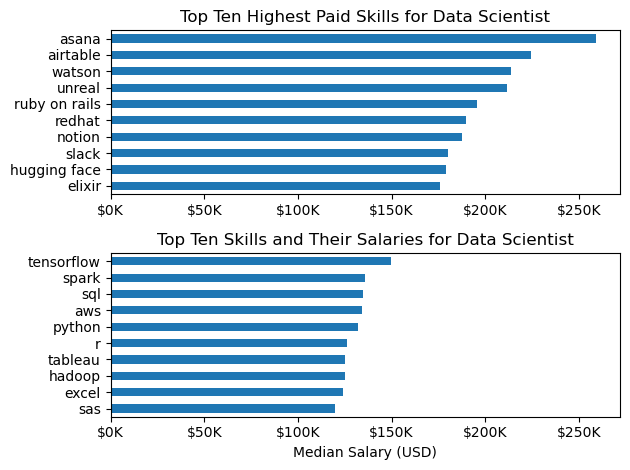

In [32]:
fig, ax = plt.subplots(2,1)

df_DS_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top Ten Highest Paid Skills for Data Scientist')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))



df_DS_top_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top Ten Skills and Their Salaries for Data Scientist')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


fig.tight_layout()